# BigMart Sales Prediction

he data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('BigMart Sale Prediction.csv')

In [3]:
df.shape

(8523, 12)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [6]:
df['Item_Fat_Content']=df['Item_Fat_Content'].map({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat',
                                                      'Low Fat':'Low Fat','Regular':'Regular'})

In [7]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [8]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [10]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

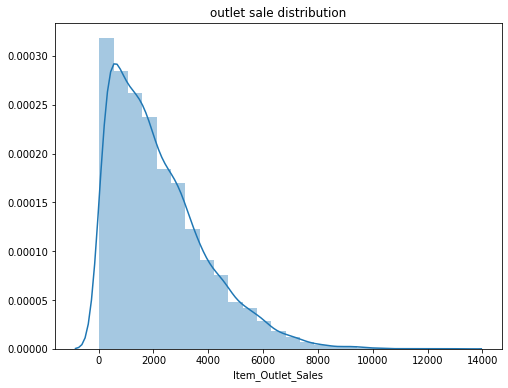

Skew is  1.1775306028542798
Kurtosis is  1.6158766814287264


In [11]:
plt.figure(figsize=(8,6))
sns.distplot(df['Item_Outlet_Sales'],bins=25)
plt.xlabel('Item_Outlet_Sales')
plt.title('outlet sale distribution')
plt.show()
print('Skew is ',+(df['Item_Outlet_Sales'].skew()))
print('Kurtosis is ',+(df['Item_Outlet_Sales'].kurt()))       

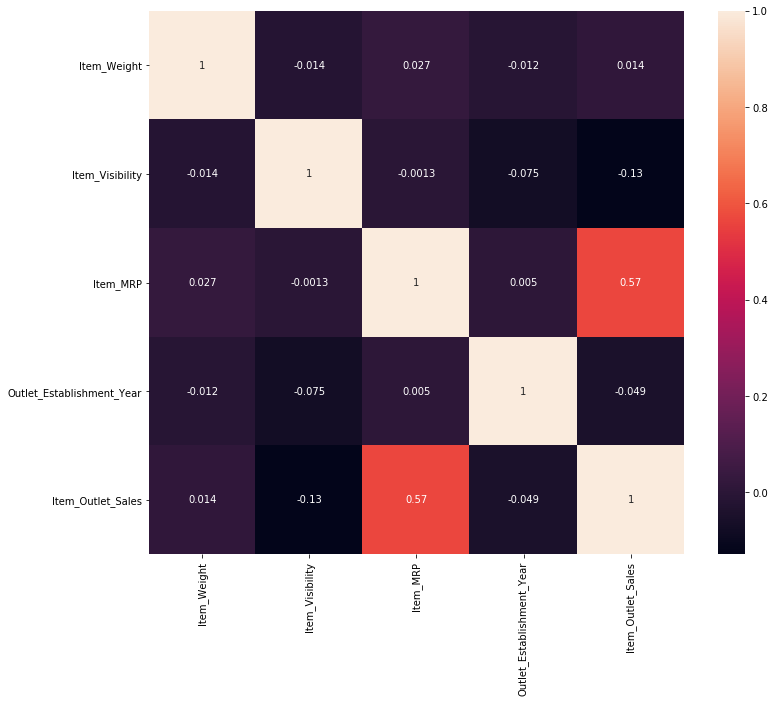

In [12]:
corr_heatmap=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_heatmap,annot=True)
plt.show()

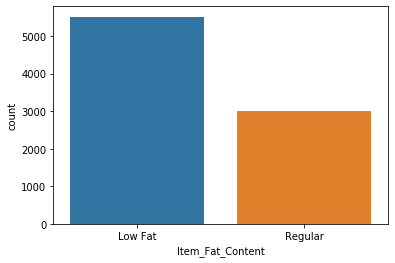

In [13]:
sns.countplot(x=df['Item_Fat_Content'])

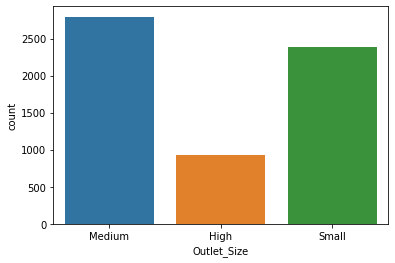

In [14]:
sns.countplot(x=df['Outlet_Size'])

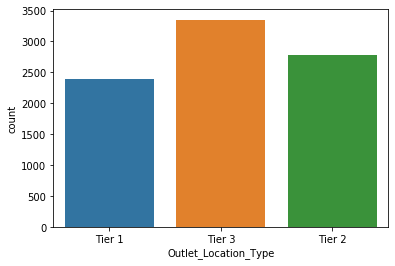

In [15]:
sns.countplot(df['Outlet_Location_Type'])

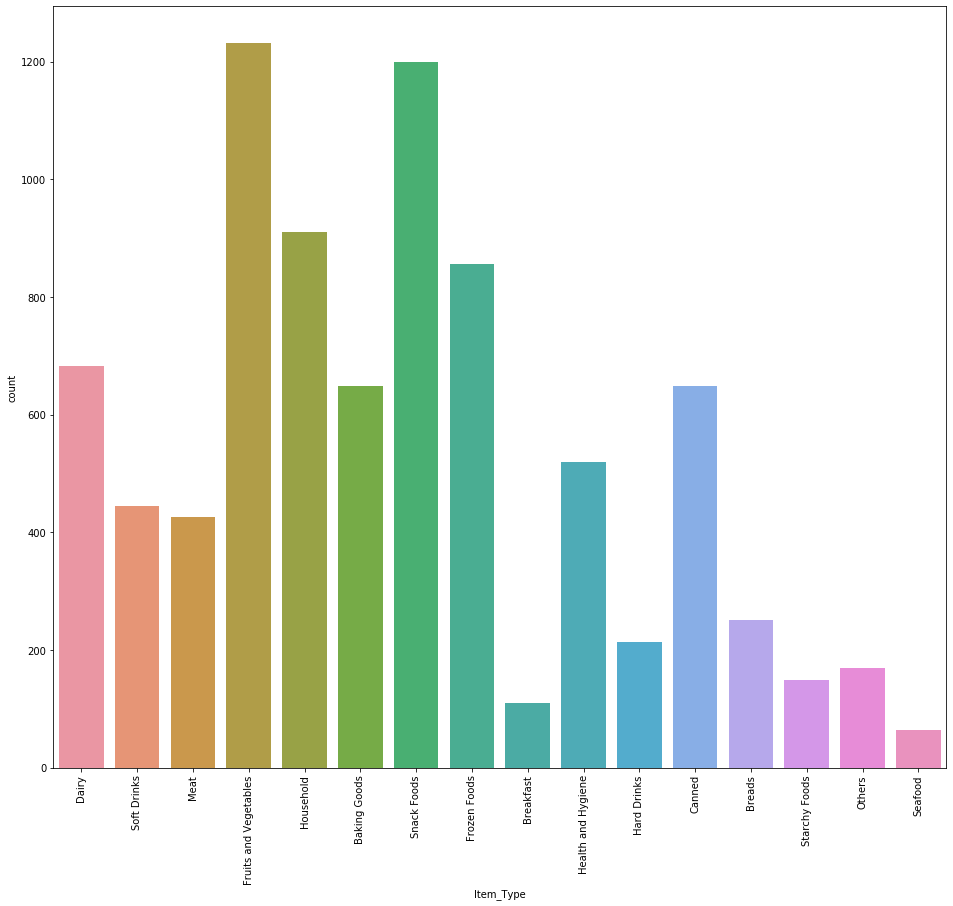

In [16]:
plt.figure(figsize=(16,14))
sns.countplot(df['Item_Type'])
plt.xticks(rotation=90)
plt.show()

In [17]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
"""Filling the missing value"""
list=df['Item_Type'].unique()
mean_value_item_type=df.groupby('Item_Type')['Item_Weight'].mean()
for i in list:
    d={i:mean_value_item_type[i]}
    s=df['Item_Type'].map(d)
    df['Item_Weight']=df['Item_Weight'].combine_first(s)

In [19]:
df['Item_Type'].isnull().sum() 

0

In [20]:
df['Outlet_Working_Years']=2019-df['Outlet_Establishment_Year']

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Working_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,10
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,20
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,21
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,32


In [22]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
0.059836      2
0.112203      2
0.044024      2
0.072253      2
0.061271      2
0.061164      2
0.145266      2
0.081097      2
0.071958      2
0.103442      2
0.074613      2
0.072655      2
0.071833      2
0.136286      2
0.041355      2
0.026950      2
0.013952      2
0.160624      2
0.080640      2
0.097611      2
0.096592      2
           ... 
0.100641      1
0.122735      1
0.099024      1
0.054600      1
0.118859      1
0.162572      1
0.076745      1
0.015461      1
0.057655      1
0.042113      1
0.029565      1
0.066447      1
0.035954      1
0.083222      1
0.021413      1
0.030921      1
0.081119      1
0.052811      1
0.118080      1
0.046654      1
0.021469      1
0.060134      1
0.096658      1
0.019064      1
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, L

In [23]:
"""Lot of zeros in item visibility which is not possible"""
df['Item_Visibility'].replace(0.000000,np.nan)
df['Item_Visibility'].fillna(df.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
5       0.000000
6       0.012741
7       0.127470
8       0.016687
9       0.094450
10      0.000000
11      0.045464
12      0.100014
13      0.047257
14      0.068024
15      0.069089
16      0.008596
17      0.069196
18      0.034238
19      0.102492
20      0.138190
21      0.035400
22      0.025698
23      0.057557
24      0.025896
25      0.099887
26      0.066693
27      0.019356
28      0.161467
29      0.072222
          ...   
8493    0.025886
8494    0.000000
8495    0.029567
8496    0.021696
8497    0.049209
8498    0.035293
8499    0.037574
8500    0.000000
8501    0.005998
8502    0.070712
8503    0.036133
8504    0.124111
8505    0.094146
8506    0.084676
8507    0.030242
8508    0.043246
8509    0.214306
8510    0.056862
8511    0.026980
8512    0.042801
8513    0.020407
8514    0.054489
8515    0.021518
8516    0.118661
8517    0.083607
8518    0.056783
8519    0.046982
8520    0.0351

In [24]:
df['Item_Visibility'].isnull().sum()

0

In [25]:
pd.crosstab(index=df['Outlet_Size'],columns=df['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In tier 2 only small Outlet is present

In [26]:
d={'Tier 2':'Small'}
s=df['Outlet_Location_Type'].map(d)
df['Outlet_Size']=df['Outlet_Size'].combine_first(s)

In [27]:
pd.crosstab(index=df['Outlet_Size'],columns=df['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,3715,0,0


In [28]:
d={'Grocery Store':'Small'}
s=df['Outlet_Type'].map(d)
df['Outlet_Size']=df['Outlet_Size'].combine_first(s)

In [29]:
df['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [30]:

df=df.drop(['Outlet_Establishment_Year'],axis=1)

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Working_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,10
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,20
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,21
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,32


In [32]:
"""droping variables which are not useful"""
df.drop(['Item_Identifier','Item_Visibility','Outlet_Identifier'],axis=1,inplace=True)

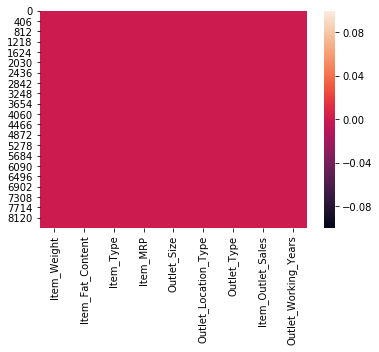

In [33]:
sns.heatmap(df.isnull())

In [34]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Working_Years
0,9.30,Low Fat,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,5.92,Regular,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,10
2,17.50,Low Fat,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,20
3,19.20,Regular,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,21
4,8.93,Low Fat,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,32


In [35]:
x=df.iloc[:,df.columns!='Item_Outlet_Sales']
x

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Working_Years
0,9.300000,Low Fat,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,20
1,5.920000,Regular,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,10
2,17.500000,Low Fat,Meat,141.6180,Medium,Tier 1,Supermarket Type1,20
3,19.200000,Regular,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,21
4,8.930000,Low Fat,Household,53.8614,High,Tier 3,Supermarket Type1,32
5,10.395000,Regular,Baking Goods,51.4008,Medium,Tier 3,Supermarket Type2,10
6,13.650000,Regular,Snack Foods,57.6588,High,Tier 3,Supermarket Type1,32
7,12.987880,Low Fat,Snack Foods,107.7622,Medium,Tier 3,Supermarket Type3,34
8,16.200000,Regular,Frozen Foods,96.9726,Small,Tier 2,Supermarket Type1,17
9,19.200000,Regular,Frozen Foods,187.8214,Small,Tier 2,Supermarket Type1,12


In [36]:
x_encoded=pd.get_dummies(x,drop_first=True)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
x_encoded_scaling=scaling.fit_transform(x_encoded)

In [38]:
y=df.iloc[:,df.columns=='Item_Outlet_Sales'].values
y.shape

(8523, 1)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_encoded_scaling,y,test_size=.25,random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
df2=pd.DataFrame({'ACTUAL VALUES':y_test.flatten(),'PREDICTED VALUES':y_pred.flatten()})
df2

,ACTUAL VALUES,PREDICTED VALUES
0,1743.0644,1346.098601
1,356.8688,725.290627
2,377.5086,873.105471
3,5778.4782,4230.489364
4,2356.9320,3235.933489
5,865.5400,601.952383
6,4613.9940,4793.081810
7,2410.8618,2044.489687
8,1948.1308,1384.318655
9,1937.4780,2803.439076


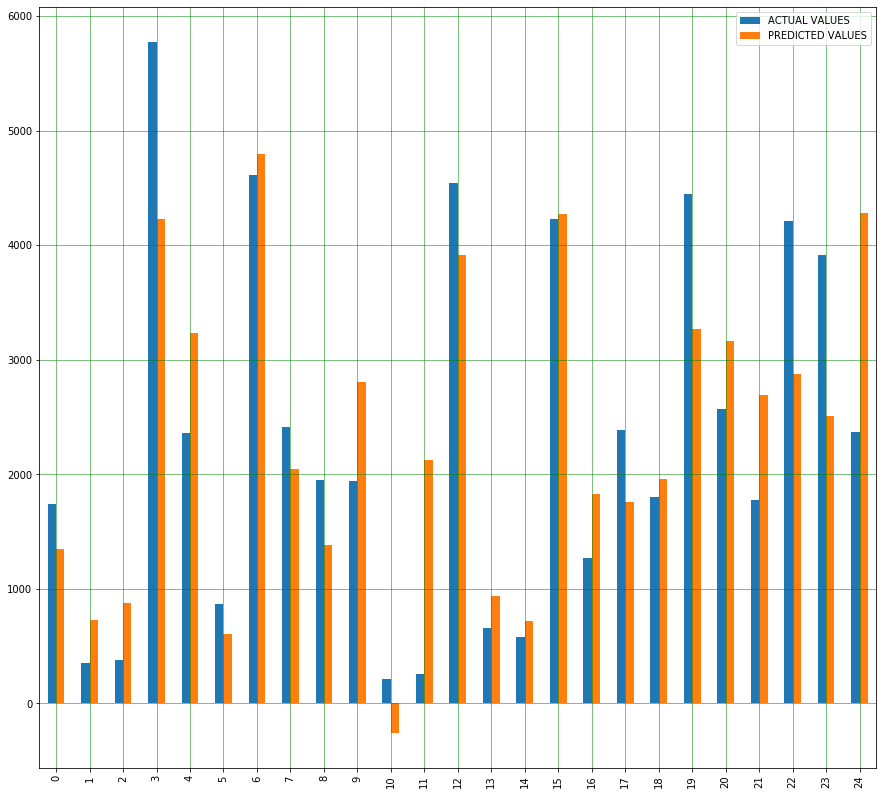

In [41]:
df3=df2.head(25)
df3.plot(kind='bar',figsize=(15,14))
plt.grid(linewidth='0.5',linestyle='-',which='major',color='green')

In [42]:
from xgboost import XGBRegressor
model2=XGBRegressor()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
df4=pd.DataFrame({'ACTUAL VALUES':y_test.flatten(),'PREDICTED VALUES':y_pred})
df4

[21:44:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,ACTUAL VALUES,PREDICTED VALUES
0,1743.0644,1302.340942
1,356.8688,727.368164
2,377.5086,718.152405
3,5778.4782,4756.786133
4,2356.9320,3352.006592
5,865.5400,624.931458
6,4613.9940,5517.538574
7,2410.8618,1998.751099
8,1948.1308,1389.448608
9,1937.4780,2594.899170


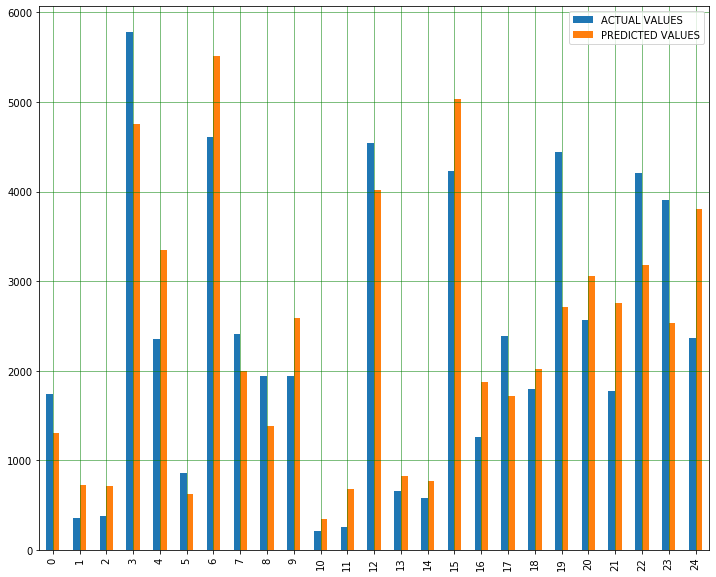

In [43]:
df5=df4.head(25)
df5.plot(kind='bar',figsize=(12,10))
plt.grid(linewidth='0.5',which='major',linestyle='-',color='green')